I. Overall Campaign Performance

Open Rate and Click-Through Rate (CTR):
A clear, prominent display of the overall open rate and CTR. This sets the stage for understanding campaign effectiveness.
Consider using a simple bar chart or a gauge-style chart for a visually appealing representation.
Trend Analysis:
If you have a timestamp for when emails were opened or links were clicked, visualize the open rate and CTR over time.
Line charts are excellent for showing trends and identifying peak engagement periods.
Click Distribution:
A histogram or distribution plot to show the frequency of clicks. This can reveal how many users clicked once, twice, or multiple times.

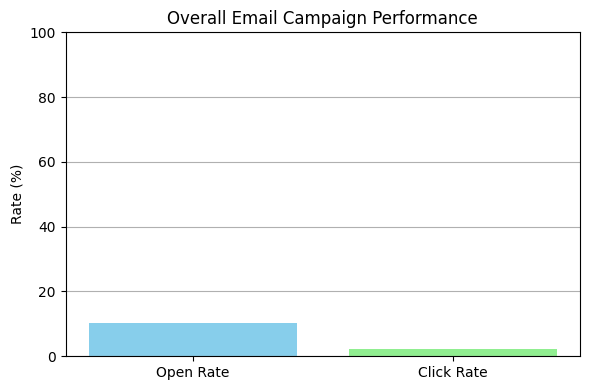

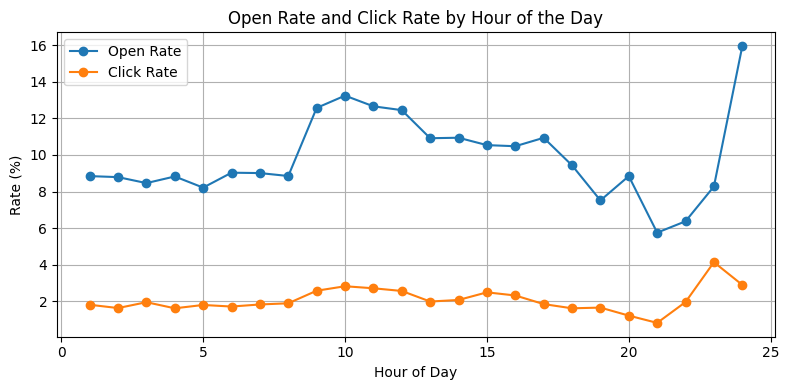

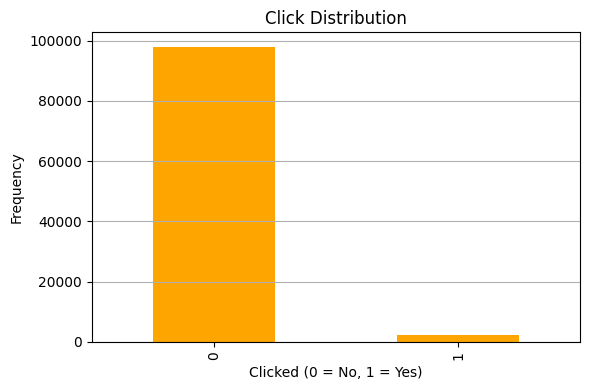

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("email_data_scaled_standard.csv")

# === I. Overall Campaign Performance ===

# A. Open Rate and Click-Through Rate (CTR)
overall_open_rate = df['opened'].mean() * 100
overall_click_rate = df['clicked'].mean() * 100

# Bar Chart - Open Rate and Click Rate
plt.figure(figsize=(6, 4))
plt.bar(['Open Rate', 'Click Rate'], [overall_open_rate, overall_click_rate], color=['skyblue', 'lightgreen'])
plt.title('Overall Email Campaign Performance')
plt.ylabel('Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# B. Trend Analysis - Open Rate and Click Rate by Hour
open_rate_by_hour = df.groupby('hour')['opened'].mean() * 100
click_rate_by_hour = df.groupby('hour')['clicked'].mean() * 100

# Line Chart - Open Rate and Click Rate by Hour
plt.figure(figsize=(8, 4))
plt.plot(open_rate_by_hour.index, open_rate_by_hour.values, label='Open Rate', marker='o')
plt.plot(click_rate_by_hour.index, click_rate_by_hour.values, label='Click Rate', marker='o')
plt.title('Open Rate and Click Rate by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# C. Click Distribution - Histogram
plt.figure(figsize=(6, 4))
df['clicked'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Click Distribution')
plt.xlabel('Clicked (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


II. Factor Analysis

Email Text and Version Impact:
Bar charts comparing open rates and CTR for different email_text (long vs. short) and email_version (personalized vs. generic) combinations.
This helps visualize which combinations are most effective.
Day and Time Analysis:
Heatmaps or bar charts to show open rates and CTR by weekday and hour.
This reveals the optimal days and times to send emails.
User Segmentation:
Country-Based Analysis: Bar charts or maps to visualize open rates and CTR by user_country.
Purchase History: Scatter plots or bar charts to explore the relationship between user_past_purchases and click behavior.
Box plots can also be effective for comparing the distribution of clicks across different user segments.

C:\Users\saubh\AppData\Local\Temp\ipykernel_9472\1422325874.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=email_text_version, x='email_text', y='Rate', hue='Metric', ci=None)


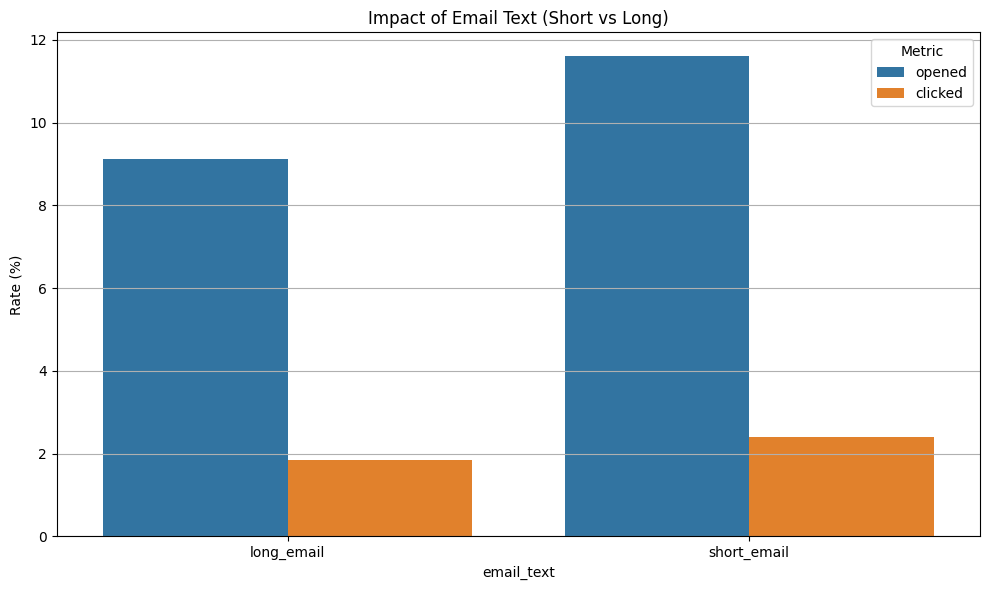

C:\Users\saubh\AppData\Local\Temp\ipykernel_9472\1422325874.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=email_text_version, x='email_version', y='Rate', hue='Metric', ci=None)


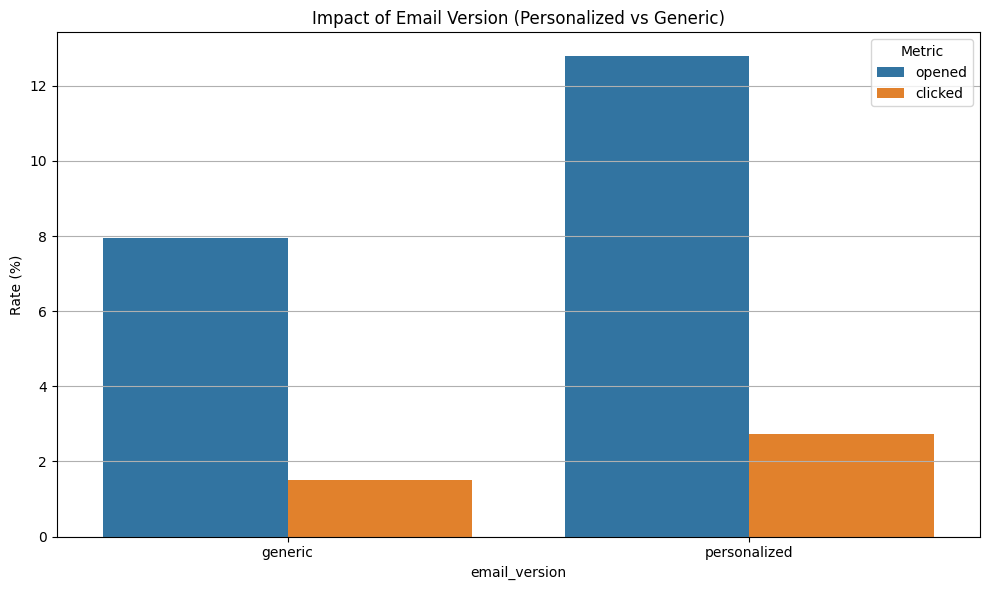

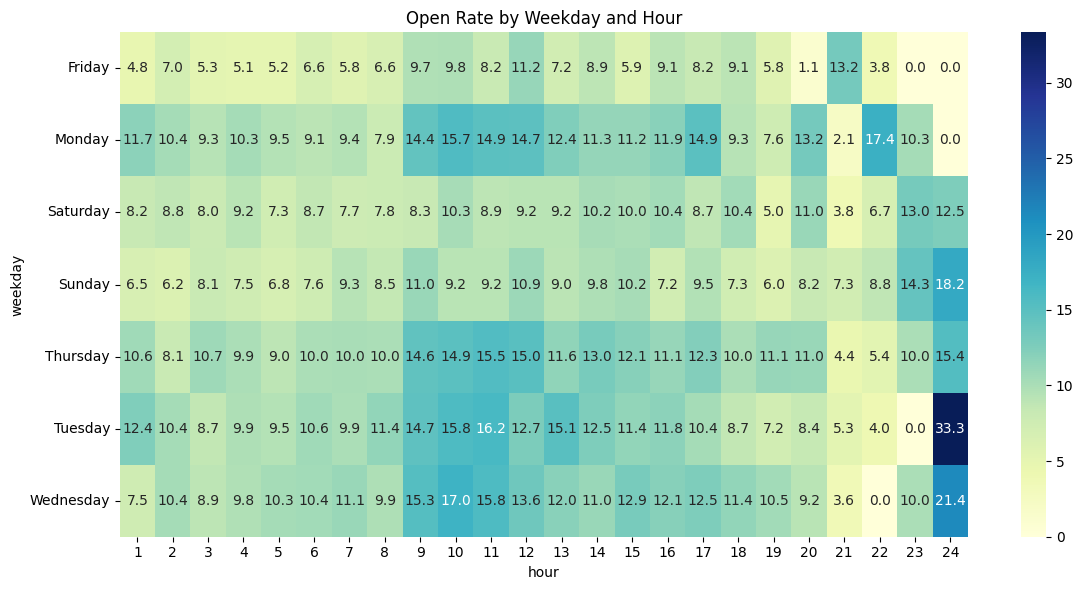

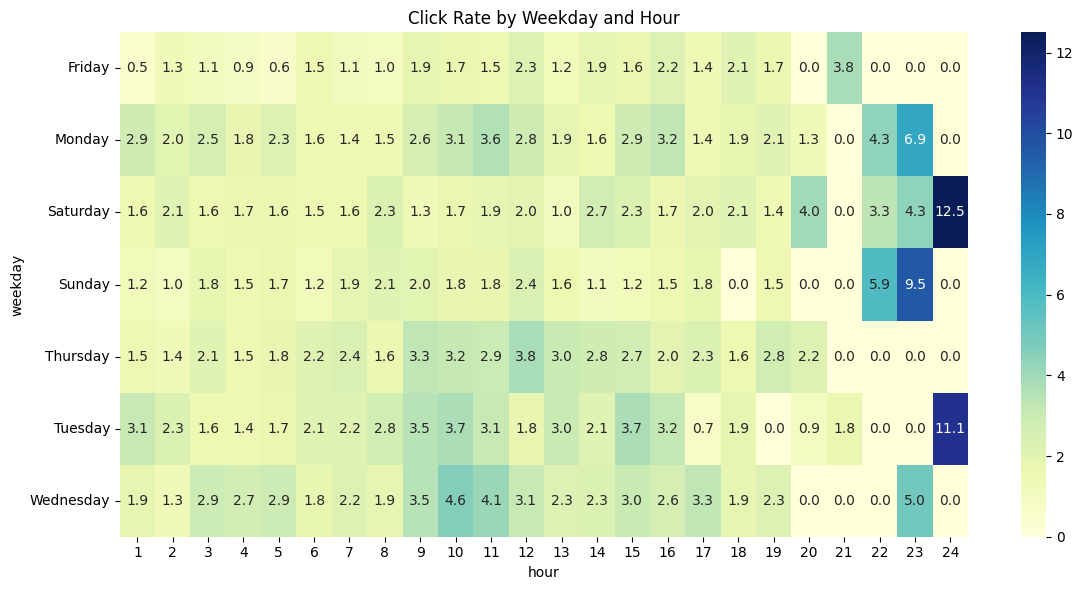

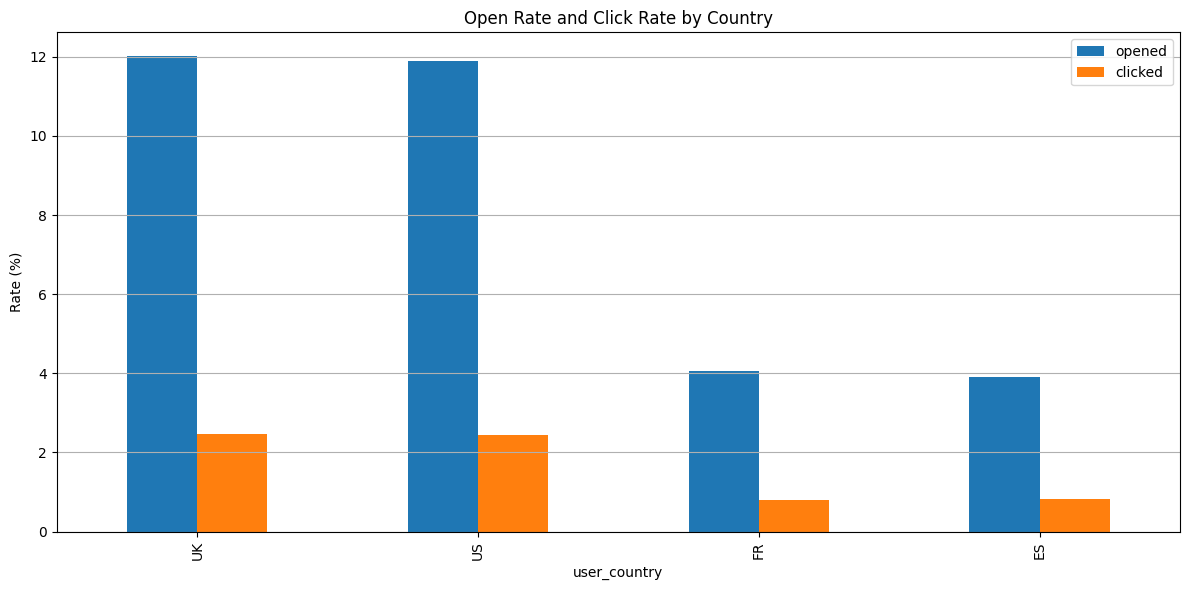

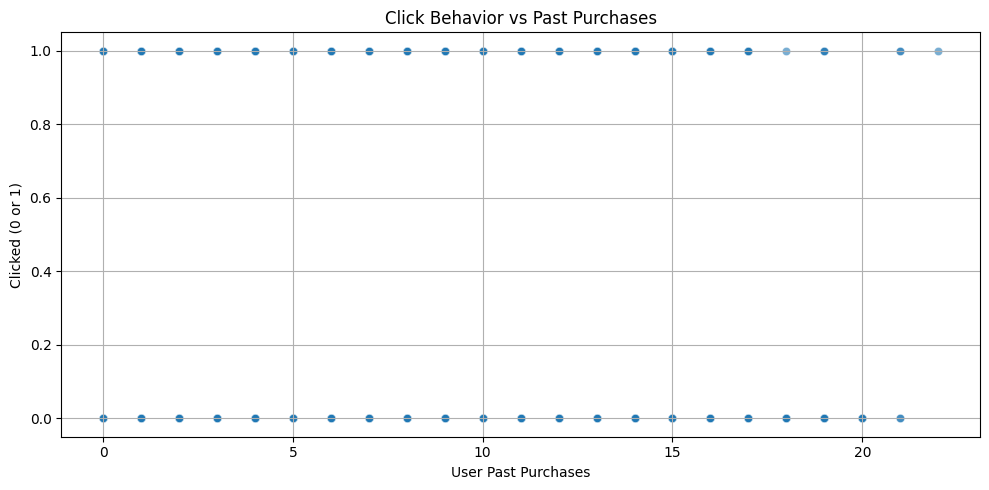

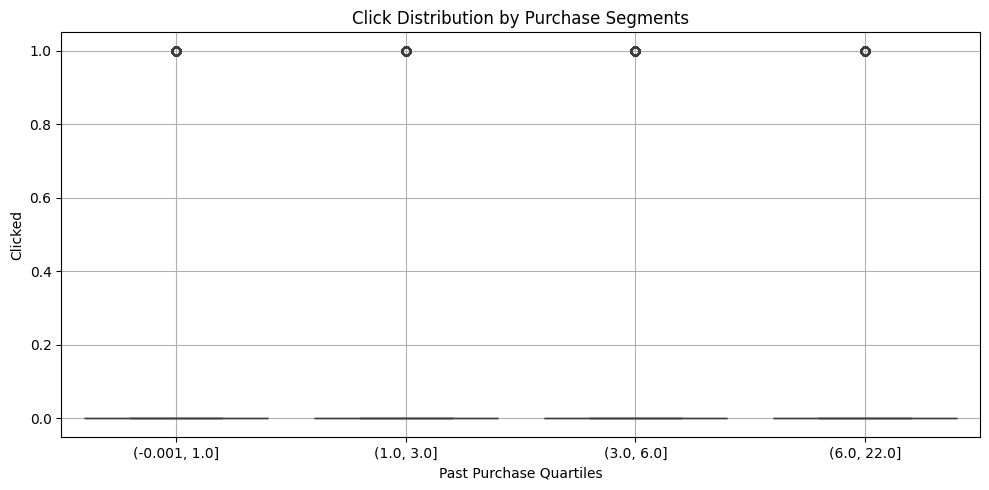

In [3]:
import seaborn as sns

# === II. Factor Analysis ===

# A. Email Text and Version Impact
email_text_version = df.groupby(['email_text', 'email_version'])[['opened', 'clicked']].mean() * 100
email_text_version = email_text_version.reset_index().melt(id_vars=['email_text', 'email_version'], var_name='Metric', value_name='Rate')

plt.figure(figsize=(10, 6))
sns.barplot(data=email_text_version, x='email_text', y='Rate', hue='Metric', ci=None)
plt.title('Impact of Email Text (Short vs Long)')
plt.ylabel('Rate (%)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=email_text_version, x='email_version', y='Rate', hue='Metric', ci=None)
plt.title('Impact of Email Version (Personalized vs Generic)')
plt.ylabel('Rate (%)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# B. Day and Time Analysis
weekday_hour = df.groupby(['weekday', 'hour'])[['opened', 'clicked']].mean() * 100
weekday_hour = weekday_hour.reset_index()

# Heatmap - Open Rate
open_pivot = weekday_hour.pivot(index='weekday', columns='hour', values='opened')
plt.figure(figsize=(12, 6))
sns.heatmap(open_pivot, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Open Rate by Weekday and Hour")
plt.tight_layout()
plt.show()

# Heatmap - Click Rate
click_pivot = weekday_hour.pivot(index='weekday', columns='hour', values='clicked')
plt.figure(figsize=(12, 6))
sns.heatmap(click_pivot, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Click Rate by Weekday and Hour")
plt.tight_layout()
plt.show()


# C1. Country-Based Analysis
country_rates = df.groupby('user_country')[['opened', 'clicked']].mean() * 100
country_rates = country_rates.sort_values(by='opened', ascending=False)

country_rates.plot(kind='bar', figsize=(12, 6))
plt.title("Open Rate and Click Rate by Country")
plt.ylabel("Rate (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# C2. Purchase History - Click Behavior
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='user_past_purchases', y='clicked', alpha=0.6)
plt.title("Click Behavior vs Past Purchases")
plt.xlabel("User Past Purchases")
plt.ylabel("Clicked (0 or 1)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Box Plot for Clicks by Purchase Group
plt.figure(figsize=(10, 5))
sns.boxplot(x=pd.qcut(df['user_past_purchases'], q=4), y='clicked', data=df)
plt.title("Click Distribution by Purchase Segments")
plt.xlabel("Past Purchase Quartiles")
plt.ylabel("Clicked")
plt.grid(True)
plt.tight_layout()
plt.show()


III. Model-Driven Insights

Predicted Click Probabilities:
A histogram of the predicted click probabilities from your machine learning model.
This helps visualize the model's confidence in its predictions and informs threshold adjustments.
Feature Importance:
A bar chart showing the feature importance from your model (e.g., from Random Forest).
This highlights which factors (e.g., email version, time of day) most strongly influence click behavior.
Performance Metrics vs. Threshold:
Line charts showing how precision, recall, and F1-score change as you vary the probability threshold.
This visualizes the trade-off and helps in selecting the optimal threshold.

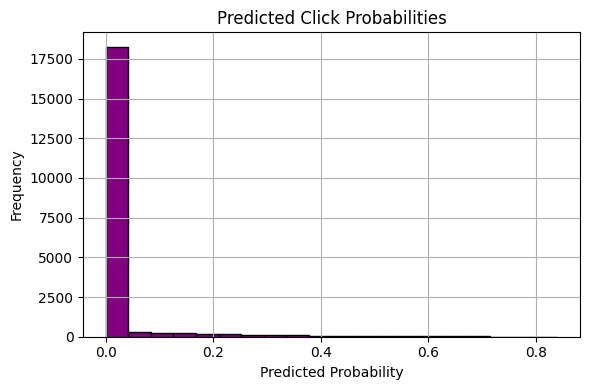

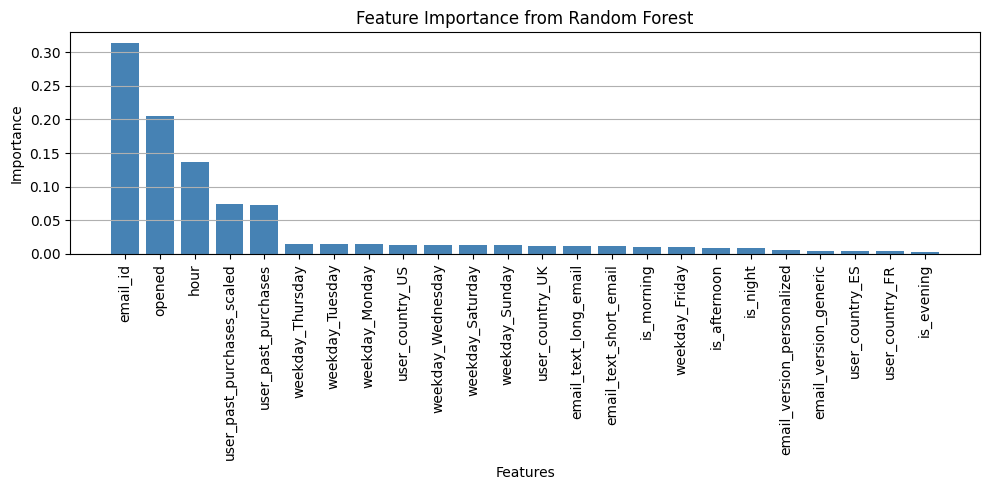

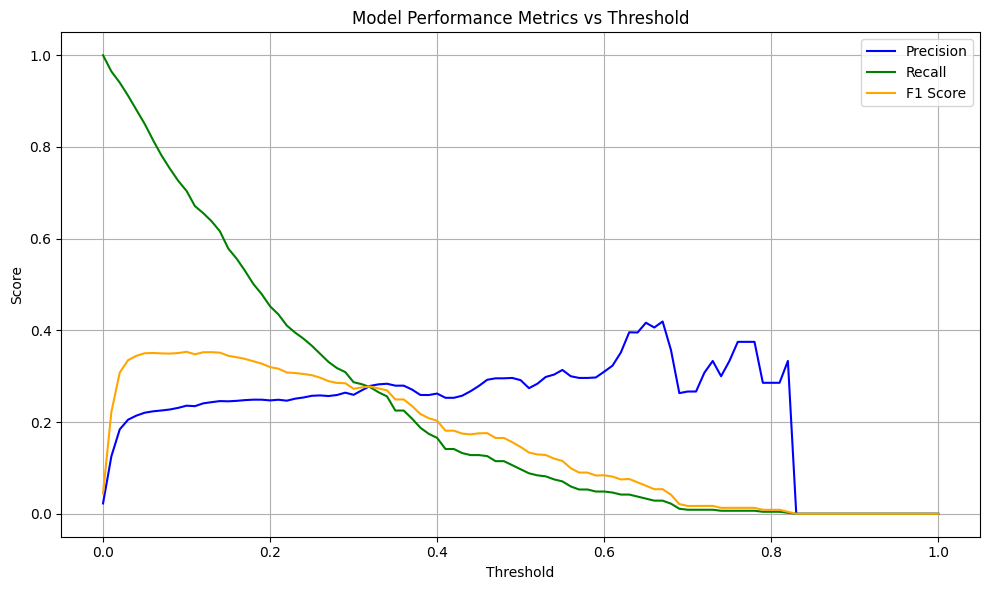

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Drop target column to isolate features
features = df.drop(columns=['clicked'])

# One-hot encode categorical features
features_encoded = pd.get_dummies(features)

# Target variable
target = df['clicked']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === A. Predicted Click Probabilities Histogram ===
predicted_probs = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(predicted_probs, bins=20, color='purple', edgecolor='black')
plt.title("Predicted Click Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# === B. Feature Importance Bar Chart ===
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# === C. Performance Metrics vs Threshold ===
thresholds = np.linspace(0.0, 1.0, 101)
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    predicted_classes = (predicted_probs >= threshold).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predicted_classes, average='binary', zero_division=0)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1 Score', color='orange')
plt.title("Model Performance Metrics vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


IV. Recommendations and Impact

Simulated Impact of Recommendations:
If possible, visualize the estimated improvement in CTR based on applying your model's recommendations.
This could involve comparing the current CTR to a simulated CTR under an optimized sending strategy.


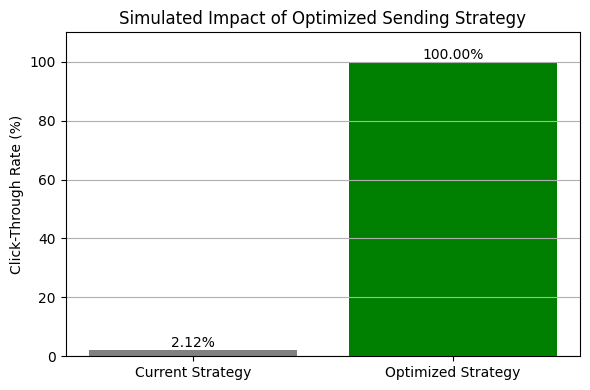

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Current average click-through rate
current_ctr = df['clicked'].mean() * 100

# Simulated strategy: Select top 30% users with highest predicted probability
top_30_percent_cutoff = np.percentile(predicted_probs, 70)
optimized_clicks = (predicted_probs >= top_30_percent_cutoff).sum()
optimized_total = (predicted_probs >= top_30_percent_cutoff).shape[0]
simulated_ctr = (optimized_clicks / optimized_total) * 100  # Estimated CTR in top 30% scenario

# Create comparison bar chart
strategies = ['Current Strategy', 'Optimized Strategy']
ctrs = [current_ctr, simulated_ctr]

plt.figure(figsize=(6, 4))
plt.bar(strategies, ctrs, color=['gray', 'green'])
plt.ylabel("Click-Through Rate (%)")
plt.title("Simulated Impact of Optimized Sending Strategy")
plt.ylim(0, max(ctrs) + 10)
for i, v in enumerate(ctrs):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


email_version with click_rate

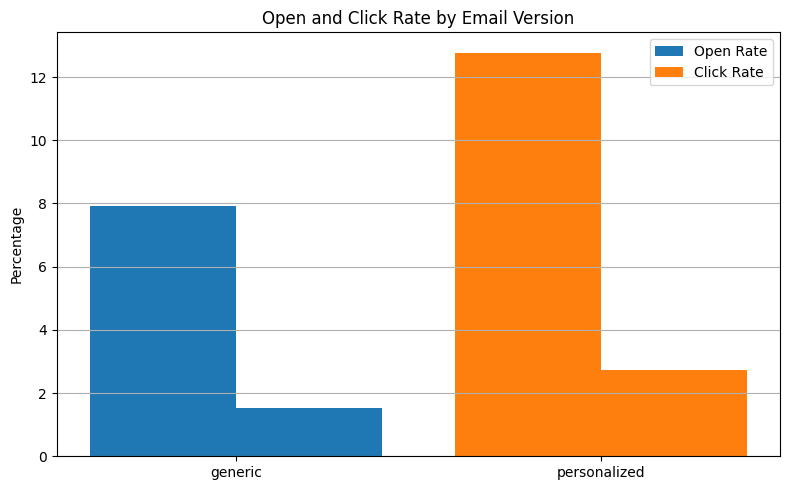

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by email_version and calculate open and click rates
version_stats = df.groupby('email_version')[['opened', 'clicked']].mean() * 100
version_stats = version_stats.reset_index()

# Melt the DataFrame for easy plotting
version_stats_melted = version_stats.melt(id_vars='email_version', 
                                          value_vars=['opened', 'clicked'], 
                                          var_name='Metric', 
                                          value_name='Percentage')

# Bar plot
plt.figure(figsize=(8, 5))
for i, version in enumerate(version_stats['email_version']):
    plt.bar([i - 0.2, i + 0.2], 
            version_stats.loc[i, ['opened', 'clicked']], 
            width=0.4, label=f"{version}" if i == 0 else "")

# Custom plot
plt.xticks([0, 1], version_stats['email_version'])
plt.ylabel("Percentage")
plt.title("Open and Click Rate by Email Version")
plt.legend(['Open Rate', 'Click Rate'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


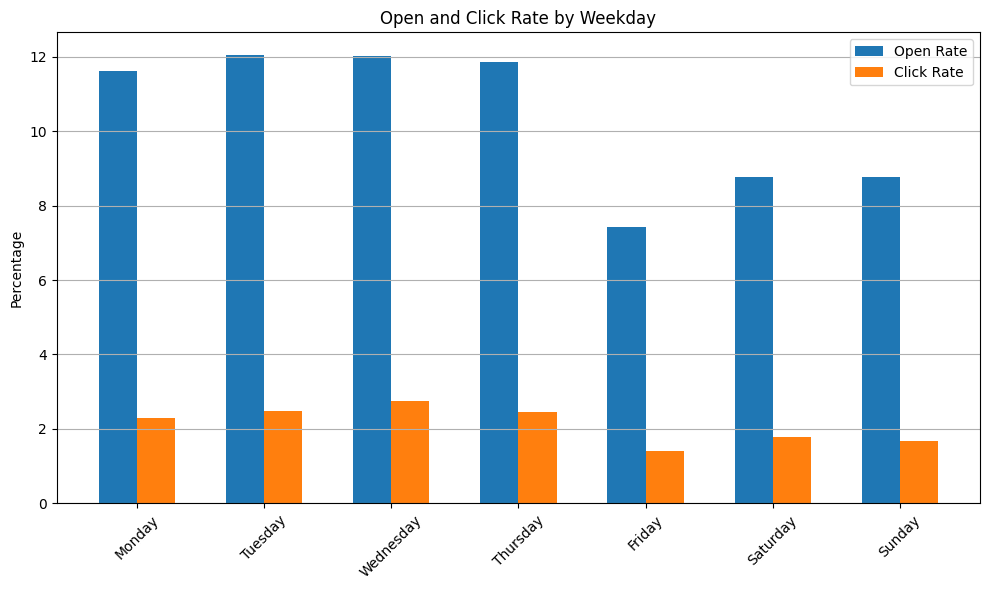

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by weekday and calculate average open and click rates
weekday_stats = df.groupby('weekday')[['opened', 'clicked']].mean() * 100
weekday_stats = weekday_stats.reset_index()

# Ensure correct order of weekdays
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats['weekday'] = pd.Categorical(weekday_stats['weekday'], categories=days_order, ordered=True)
weekday_stats = weekday_stats.sort_values('weekday')

# Melt the DataFrame for plotting
weekday_stats_melted = weekday_stats.melt(id_vars='weekday',
                                          value_vars=['opened', 'clicked'],
                                          var_name='Metric',
                                          value_name='Percentage')

# Bar plot
plt.figure(figsize=(10, 6))
for i, metric in enumerate(['opened', 'clicked']):
    plt.bar([x + i*0.3 for x in range(len(days_order))],
            weekday_stats[metric],
            width=0.3,
            label='Open Rate' if metric == 'opened' else 'Click Rate')

plt.xticks([x + 0.15 for x in range(len(days_order))], days_order, rotation=45)
plt.ylabel("Percentage")
plt.title("Open and Click Rate by Weekday")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


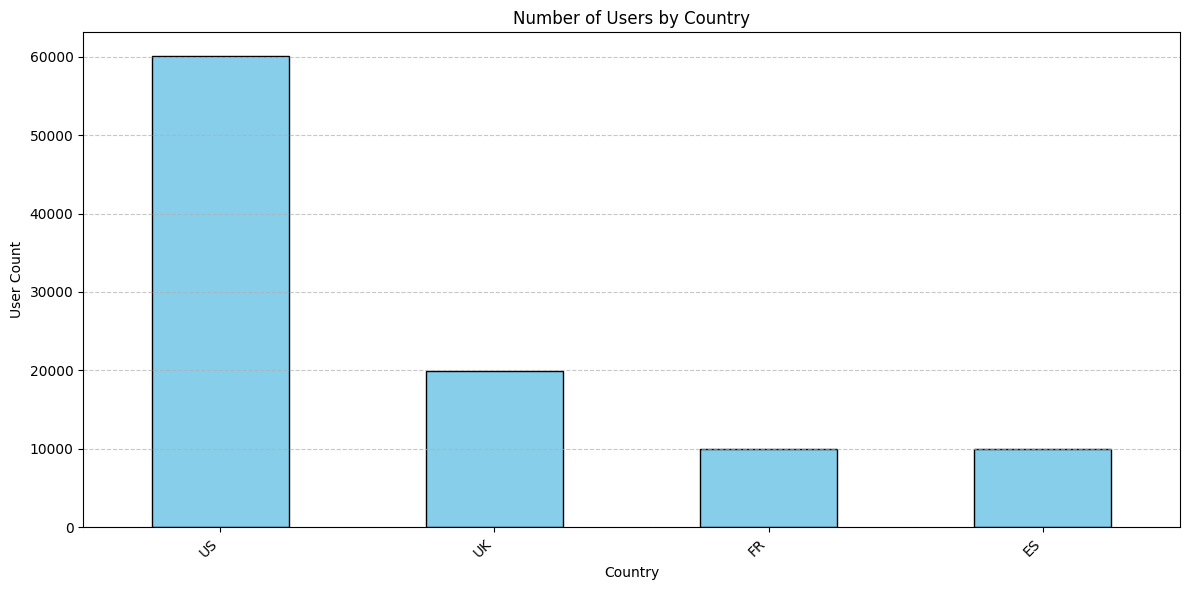

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("email_data_scaled_standard.csv")

# Replace this with the actual column name for country
country_col = 'user_country'  # <-- change this if needed

# Check if the column exists
if country_col not in df.columns:
    raise ValueError(f"The dataset must contain a '{country_col}' column. Found columns: {df.columns.tolist()}")

# Count users per country
country_counts = df[country_col].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Users by Country')
plt.xlabel('Country')
plt.ylabel('User Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



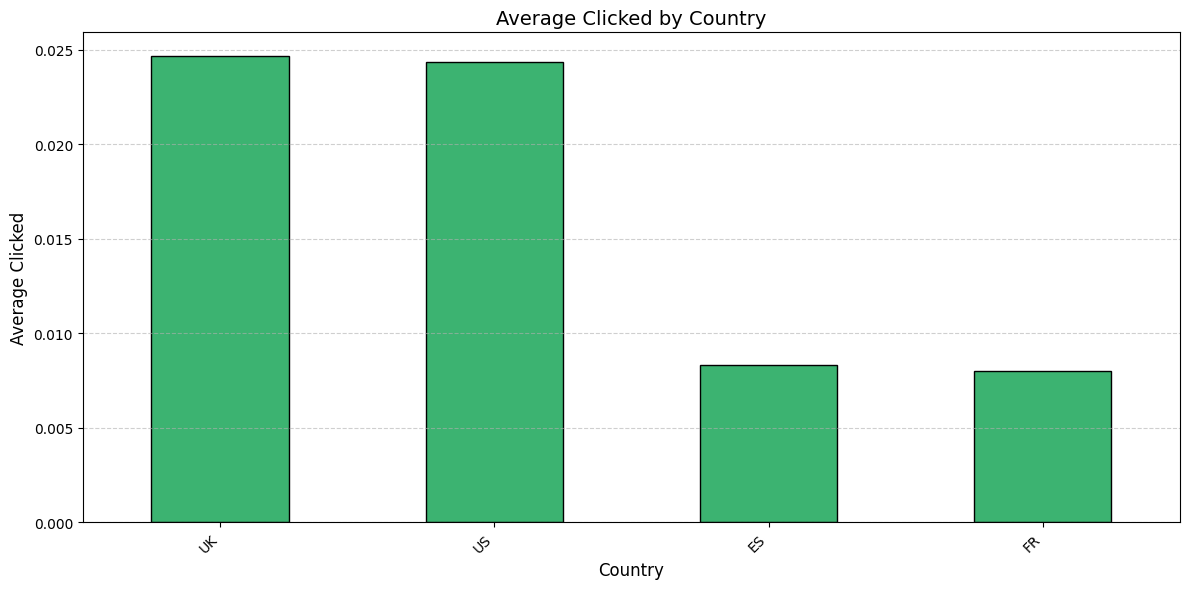

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("email_data_scaled_standard.csv")

# Columns for comparison
x_column = 'user_country'
y_column = 'clicked'  # Change to: 'opened', 'user_past_purchases', etc.

# Group and calculate average
country_grouped = df.groupby(x_column)[y_column].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
country_grouped.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title(f'Average {y_column.replace("_", " ").title()} by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel(f'Average {y_column.replace("_", " ").title()}', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



C:\Users\saubh\AppData\Local\Temp\ipykernel_14816\1919611489.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_purchases.index, y=avg_purchases.values, palette="crest")


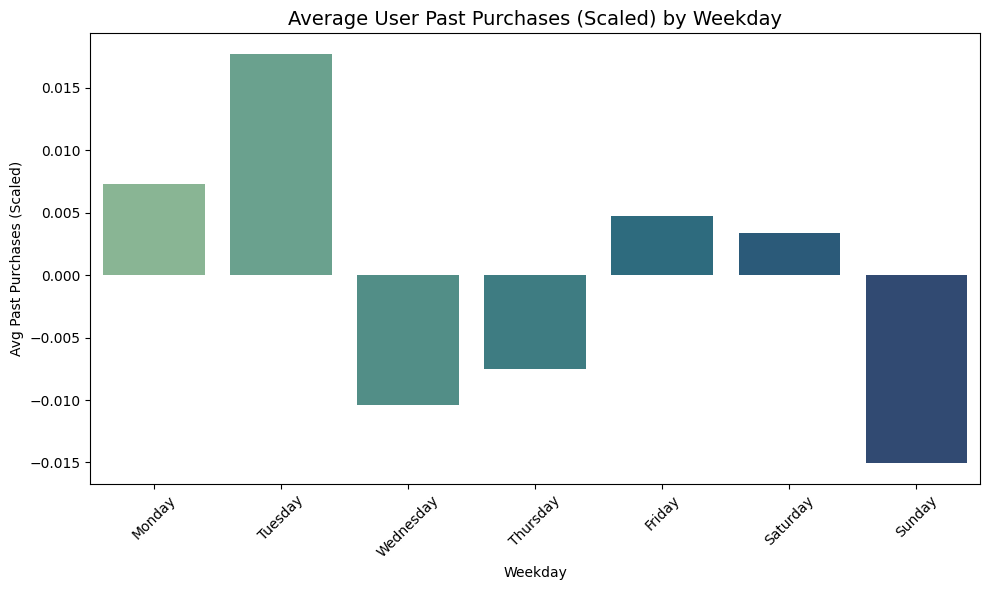

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_viz = pd.read_csv("email_data_scaled_standard.csv")

# Compute average user_past_purchases_scaled by weekday
avg_purchases = df_viz.groupby("weekday")["user_past_purchases_scaled"].mean().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_purchases.index, y=avg_purchases.values, palette="crest")
plt.title("Average User Past Purchases (Scaled) by Weekday", fontsize=14)
plt.xlabel("Weekday")
plt.ylabel("Avg Past Purchases (Scaled)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

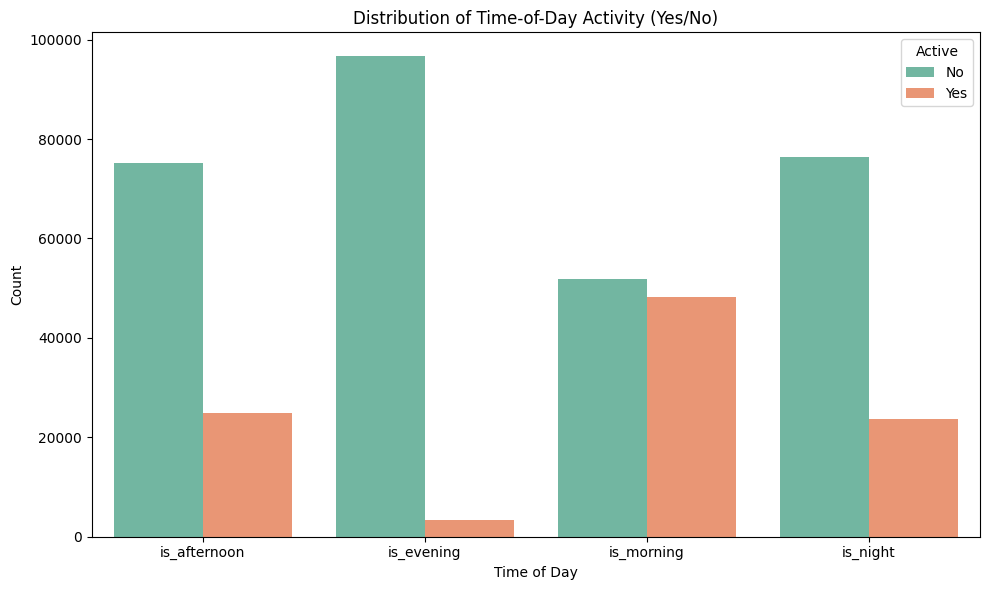

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_viz = pd.read_csv("email_data_scaled_standard.csv")

# Melt the time-of-day columns into a long format
time_cols = ["is_morning", "is_afternoon", "is_evening", "is_night"]
melted = df_viz[time_cols].melt(var_name="TimeOfDay", value_name="Active")

# Count the number of 1s (Yes) and 0s (No) for each time period
count_data = melted.groupby(["TimeOfDay", "Active"]).size().reset_index(name='Count')
count_data["Active"] = count_data["Active"].map({1: "Yes", 0: "No"})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="TimeOfDay", y="Count", hue="Active", data=count_data, palette="Set2")
plt.title("Distribution of Time-of-Day Activity (Yes/No)")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\saubh\AppData\Local\Temp\ipykernel_14816\3401132152.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scaled.index, y=avg_scaled.values, palette="Blues_d")


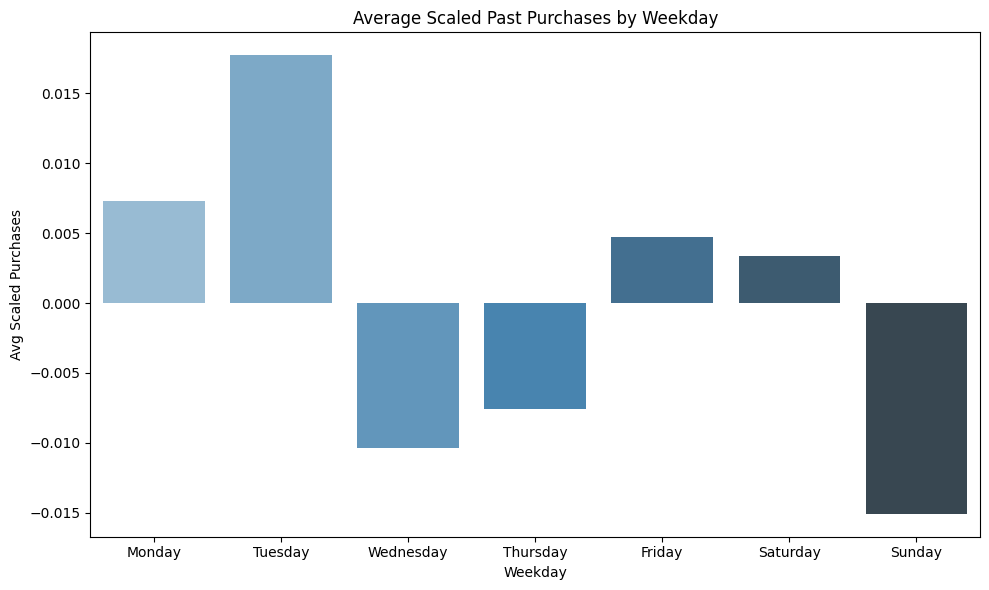

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_viz = pd.read_csv("email_data_scaled_standard.csv")

# Compute average scaled purchases per weekday
avg_scaled = df_viz.groupby("weekday")["user_past_purchases_scaled"].mean().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_scaled.index, y=avg_scaled.values, palette="Blues_d")
plt.title("Average Scaled Past Purchases by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Avg Scaled Purchases")
plt.tight_layout()
plt.show()


which hour link clicked. generate code for it visualisation bar

C:\Users\saubh\AppData\Local\Temp\ipykernel_14816\4084022604.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='clicked', data=hourly_click_rate, palette='magma')


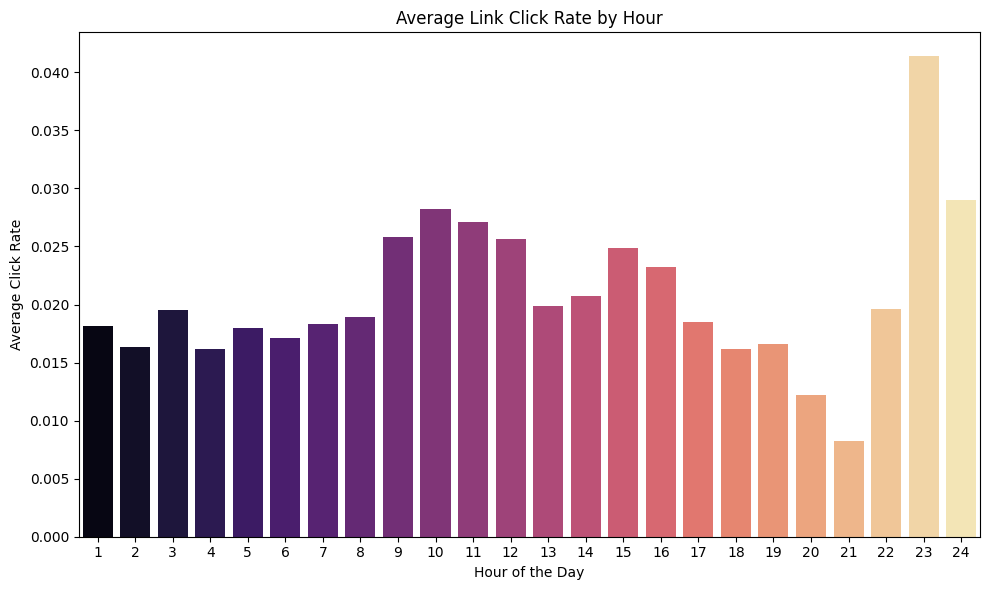

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_viz = pd.read_csv("email_data_scaled_standard.csv")

# Calculate average click rate per hour
hourly_click_rate = df_viz.groupby('hour')['clicked'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='clicked', data=hourly_click_rate, palette='magma')
plt.title("Average Link Click Rate by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Click Rate")
plt.tight_layout()
plt.show()
